# Tong Phasutha-Ekkasit

## Research question/interests

**How do regions that people are located in the US affect individuals' BMI and medical expenses?**

I am interested to explore how can regions determine the medical expenses of individuals. I would like to know the relationship between regions and medical expenses. I believe that, by exploring this relationship, it may provide insight into whether BMI and medical expenses will be high or low impacted by places where people are located. It can be because other factors, such as types of food in each regions, weather, the cost of living, the standard of living in each region, can influence the price or medical cost of individuals.


My plan:
1. I will perform the entire dataset first.
2. I will clean data and present only columns that are related to my research questions. In this case for my research question, I need region, bmi, and charges columns to be cpecifically presented.
3. I will process data and wrangle data from the highest medical expenses in each region some useful visualizations to answer my research question.
4. I will do some more research and use other sources to support my question and answers.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/raw/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


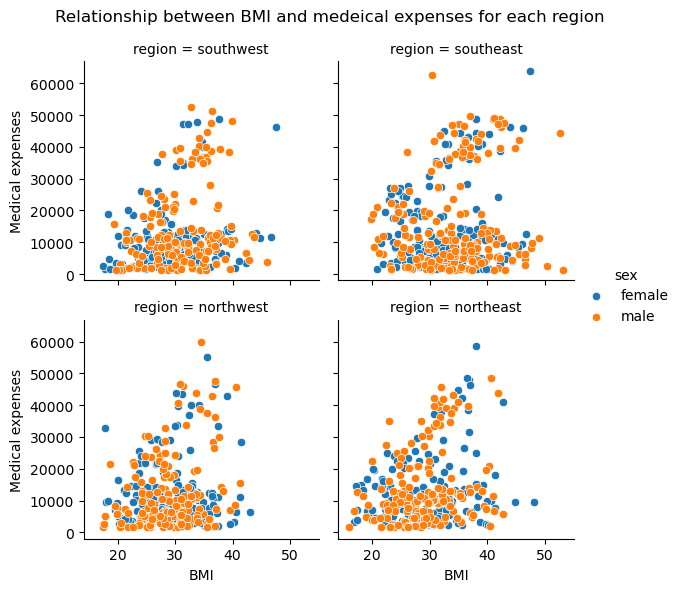

In [3]:
g = sns.FacetGrid(data=df, col="region",col_wrap=2,hue='sex')
g.fig.suptitle('Relationship between BMI and medeical expenses for each region')
g.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI")
g.add_legend()

# Understand Variables

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df['region'].unique().tolist()

['southwest', 'southeast', 'northwest', 'northeast']

In [6]:
df_groupby=df.groupby('region').count().reset_index()
df_groupby

,region,age,sex,bmi,children,smoker,charges
0,northeast,324,324,324,324,324,324
1,northwest,325,325,325,325,325,325
2,southeast,364,364,364,364,364,364
3,southwest,325,325,325,325,325,325


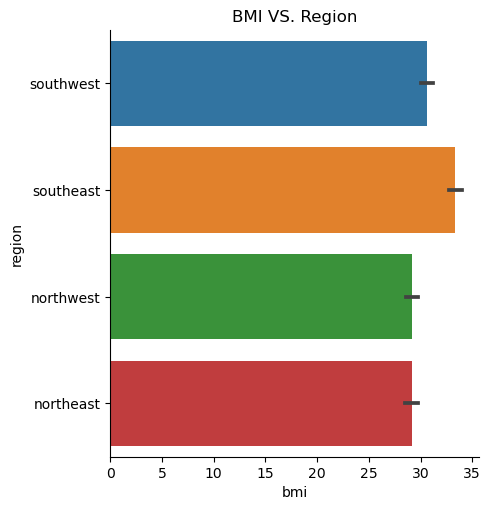

In [48]:
sns.catplot(data=df,y='region',x='bmi',kind='bar').set(title="BMI VS. Region")
#People who are located in Southeast have the highest mean for bmi

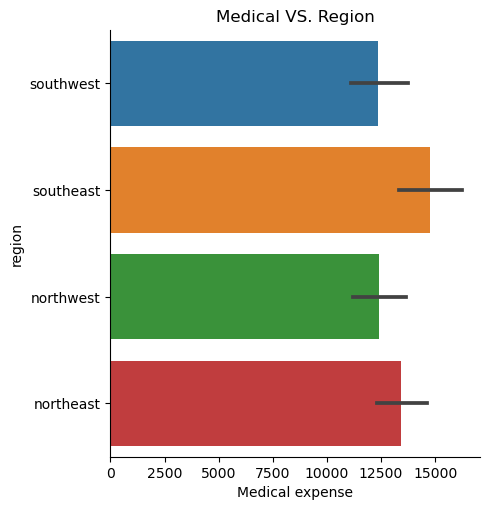

In [49]:
sns.catplot(data=df,y='region',x='charges',kind='bar').set(xlabel="Medical expense", title="Medical VS. Region")
#People who are located in Southeast have the highest mean for medical expenses

#### What I notiec from graph above: People who are located in Southest have the highest BMI mean and also highest mdeical expense mean.

# Clean Data


### Table of Relationship Among bmi, region, and charges

In [11]:
df_drop1=df.drop(columns=['age','sex','children','smoker'])
df_drop1

,bmi,region,charges
0,27.900,southwest,16884.92400
1,33.770,southeast,1725.55230
2,33.000,southeast,4449.46200
3,22.705,northwest,21984.47061
4,28.880,northwest,3866.85520
...,...,...,...
1333,30.970,northwest,10600.54830
1334,31.920,northeast,2205.98080
1335,36.850,southeast,1629.83350
1336,25.800,southwest,2007.94500


In [52]:
df1=df_drop1[(df_drop1['bmi']<18.5)]
df1.sort_values('charges', ascending=False)

,bmi,region,charges
128,17.765,northwest,32734.18630
1085,18.300,southwest,19023.26000
380,17.955,northeast,15006.57945
412,17.195,northeast,14455.64405
1074,18.335,northeast,13204.28565
250,17.290,northeast,12829.45510
950,18.335,northeast,11534.87265
1133,18.335,northwest,9991.03765
198,18.050,northwest,9644.25250
1029,17.290,northeast,6877.98010


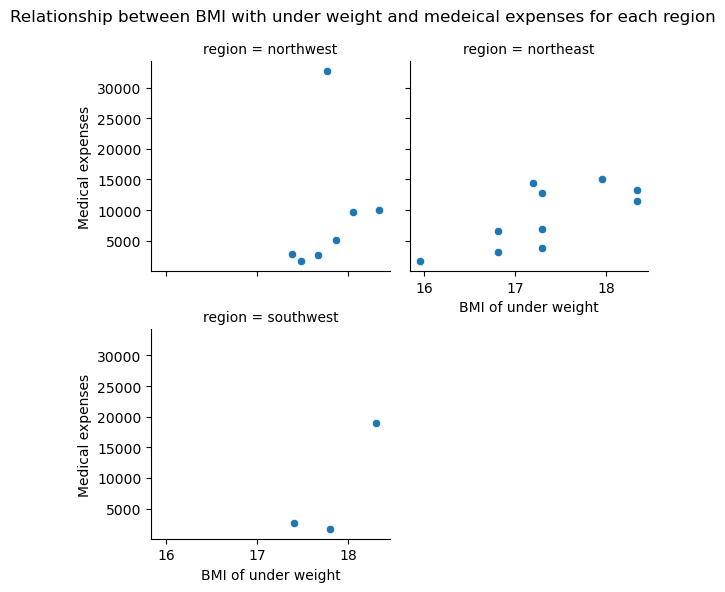

In [55]:
under = sns.FacetGrid(data=df1, col="region",col_wrap=2)
under.fig.suptitle('Relationship between BMI with under weight and medeical expenses for each region')
under.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI of under weight")

In [57]:
df2=df_drop1[(df_drop1['bmi']>=18.5)&(df_drop1['bmi']<=24.9)]
df2.sort_values('charges', ascending=False)

,bmi,region,charges
917,22.895,northeast,35069.37452
62,24.700,northwest,30166.61817
140,22.420,northeast,27375.90478
1142,24.860,southeast,27117.99378
664,22.990,southeast,27037.91410
...,...,...,...
1292,23.210,southeast,1515.34490
584,20.700,southwest,1242.81600
681,20.300,southwest,1242.26000
1251,19.800,southwest,1241.56500


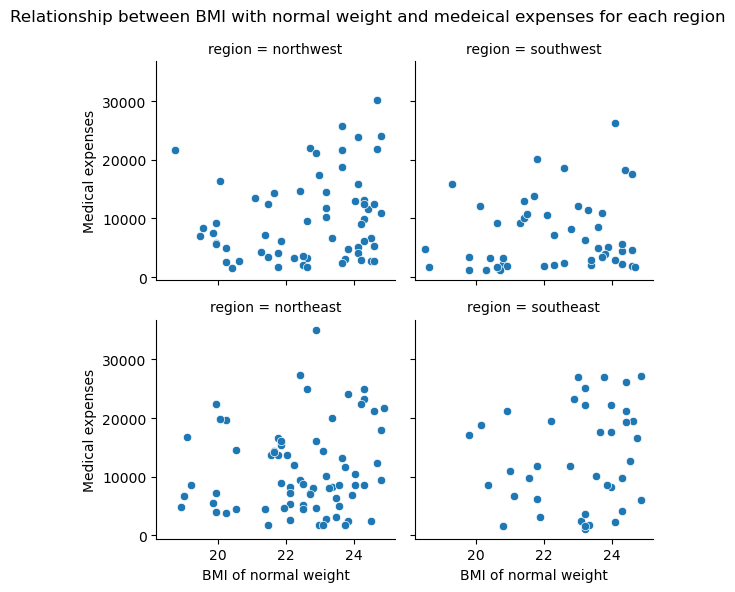

In [58]:
normal = sns.FacetGrid(data=df2, col="region",col_wrap=2)
normal.fig.suptitle('Relationship between BMI with normal weight and medeical expenses for each region')
normal.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI of normal weight")

In [59]:
df3=df_drop1[(df_drop1['bmi']>=25)&(df_drop1['bmi']<=29.9)]
df3.sort_values('charges', ascending=False)

,bmi,region,charges
524,26.070,southeast,38245.59327
1303,27.800,southwest,37829.72420
242,26.800,southwest,35160.13457
476,28.500,northeast,35147.52848
641,28.310,northwest,32787.45859
...,...,...,...
133,25.555,northwest,1632.56445
464,25.175,northwest,1632.03625
236,26.730,southeast,1615.76670
487,28.700,southwest,1253.93600


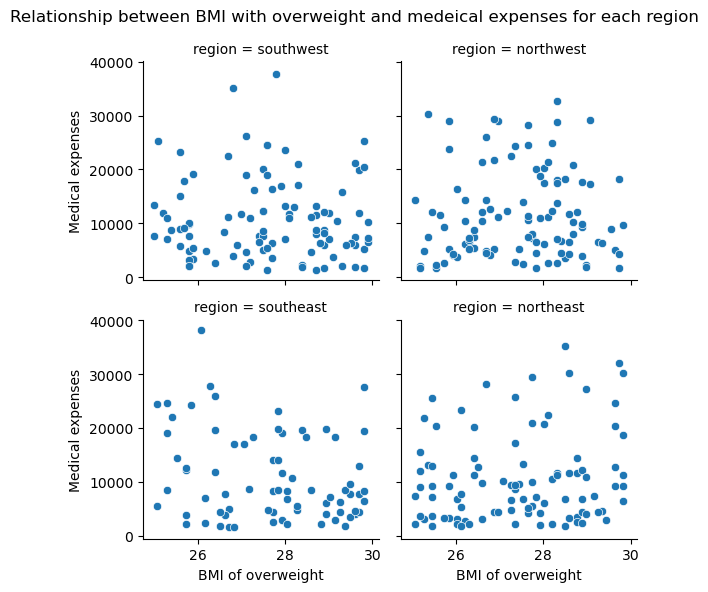

In [60]:
over = sns.FacetGrid(data=df3, col="region",col_wrap=2)
over.fig.suptitle('Relationship between BMI with overweight and medeical expenses for each region')
over.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI of overweight")

In [61]:
df4=df_drop1[(df_drop1['bmi']>=30)]
df4.sort_values('charges', ascending=False)

,bmi,region,charges
543,47.410,southeast,63770.42801
1300,30.360,southeast,62592.87309
1230,34.485,northwest,60021.39897
577,38.095,northeast,58571.07448
819,35.530,northwest,55135.40209
...,...,...,...
194,34.430,southeast,1137.46970
22,34.100,southeast,1137.01100
663,33.660,southeast,1136.39940
1244,33.330,southeast,1135.94070


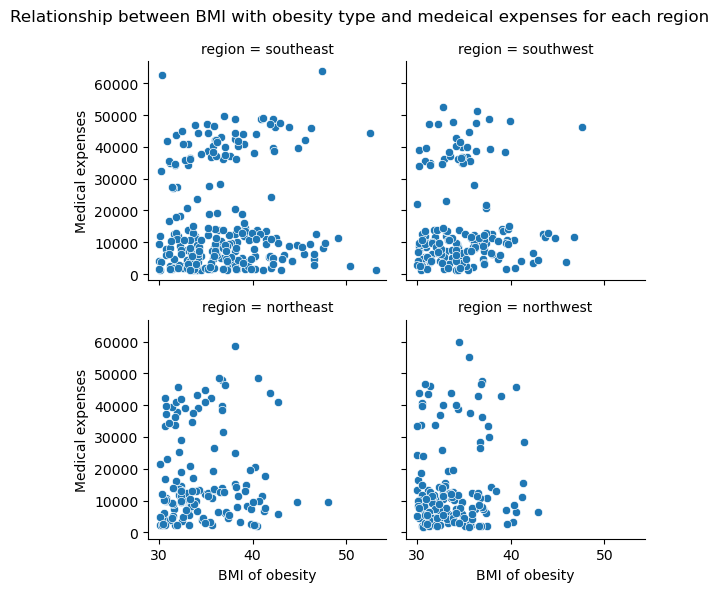

In [62]:
obe = sns.FacetGrid(data=df4, col="region",col_wrap=2)
obe.fig.suptitle('Relationship between BMI with obesity type and medeical expenses for each region')
obe.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI of obesity")

### Obervation from the analysis above
- There is no information regarding people who are located in southeast with BMI below 15.9 which is underweight There is only one case with underweight paying medical expense higher than 30000 dollars and that person is located in northwest. There is one person who is located in southwest has to pay the medical expense around 20000 dollars. Other cases in other regions pay lower than 15000 dollars. 
- A person who is located in northeast has to pay 35000 dollar, that is the only case of all the regions that pay higher than 30000 dollars within people with normal weight. 
- The highest medical expense happen with a person who is located in southeast. Yet, most people in each region have the medical expense lower than 25000 dollars
- Clearly, People with normal or overweight have similar medical expense and it is between 5000 and 15000 dollars
- There are more poeple with obesity going to hospital and pay for medical expense. It can be noticed from the density of the graph above.



# Milestone 4
                 

# Updated reserach question
## Research question/interests

**How does female in age 20-35 with obesity (bmi >30) with children in each region have different medical expenses compared to female in age 36-50 with obesity with children in each region?**

In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [64]:
df = pd.read_csv("../data/raw/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Task 1
#### Load Data

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Clean Data

In [23]:
#remove column and rename
df0=df.drop(columns='smoker')
df1=df0.rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
df1

,Age,Sex,BMI,Children,Region,Medical expenses
0,19,female,27.900,0,southwest,16884.92400
1,18,male,33.770,1,southeast,1725.55230
2,28,male,33.000,3,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830
1334,18,female,31.920,0,northeast,2205.98080
1335,18,female,36.850,0,southeast,1629.83350
1336,21,female,25.800,0,southwest,2007.94500


#### Process Data/Wrangling Data

In [24]:
#in order to see which group of age of each individual belong to, I have build the function to separate according to age.
def typeofage(age):
    if age <= 19:
        return 'adolescent'
    elif 20 <= age <= 35:
        return 'young adult'
    elif 36 <= age <= 50:
        return 'middle-aged adult'
    elif 51 <= age <= 65:
        return 'older adult'  
    else:
        return 'elderly'

df1['Group of age'] = df1['Age'].apply(lambda x: typeofage(x))

df1

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
0,19,female,27.900,0,southwest,16884.92400,adolescent
1,18,male,33.770,1,southeast,1725.55230,adolescent
2,28,male,33.000,3,southeast,4449.46200,young adult
3,33,male,22.705,0,northwest,21984.47061,young adult
4,32,male,28.880,0,northwest,3866.85520,young adult
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,middle-aged adult
1334,18,female,31.920,0,northeast,2205.98080,adolescent
1335,18,female,36.850,0,southeast,1629.83350,adolescent
1336,21,female,25.800,0,southwest,2007.94500,young adult


In [25]:
df2=df1.loc[(df1['Age']<=35) & (df1['Age']>=20)]
df3=df2.loc[df1['Sex']=='female']
df4=df3.loc[(df1['BMI']>=30)]
df5=df4.loc[df1['Children']!=0]
df5

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
21,30,female,32.400,1,southwest,4149.73600,young adult
23,34,female,31.920,1,northeast,37701.87680,young adult
41,31,female,36.630,2,southeast,4949.75870,young adult
51,21,female,33.630,2,northwest,3579.82870,young adult
59,34,female,37.335,2,northwest,5989.52365,young adult
95,28,female,37.620,1,southeast,3766.88380,young adult
145,29,female,38.830,3,southeast,5138.25670,young adult
152,32,female,37.145,3,northeast,6334.34355,young adult
166,20,female,37.000,5,southwest,4830.63000,young adult
167,32,female,33.155,3,northwest,6128.79745,young adult


In [26]:
df_young=df5.sort_values('Region',ascending=True).sort_values('Age',ascending=True).reset_index(drop=True)
df_young

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
0,20,female,37.000,5,southwest,4830.63000,young adult
1,20,female,31.790,2,southeast,3056.38810,young adult
2,21,female,33.630,2,northwest,3579.82870,young adult
3,21,female,32.680,2,northwest,26018.95052,young adult
4,22,female,34.580,2,northeast,3925.75820,young adult
5,22,female,31.020,3,southeast,35595.58980,young adult
6,23,female,32.780,2,southeast,36021.01120,young adult
7,23,female,39.270,2,southeast,3500.61230,young adult
8,23,female,34.960,3,northwest,4466.62140,young adult
9,23,female,36.670,2,northeast,38511.62830,young adult


In [27]:
dfa=df1.loc[(df1['Age']<=50) & (df1['Age']>=36)]
dfb=dfa.loc[df1['Sex']=='female']
dfc=dfb.loc[(df1['BMI']>=30) ]
dfd=dfc.loc[df1['Children']!=0]

dfd

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
6,46,female,33.440,1,southeast,8240.58960,middle-aged adult
43,37,female,30.800,2,southeast,6313.75900,middle-aged adult
83,48,female,41.230,4,northwest,11033.66170,middle-aged adult
84,37,female,34.800,2,southwest,39836.51900,middle-aged adult
124,47,female,33.915,3,northwest,10115.00885,middle-aged adult
...,...,...,...,...,...,...,...
1180,42,female,41.325,1,northeast,7650.77375,middle-aged adult
1218,46,female,34.600,1,southwest,41661.60200,middle-aged adult
1219,38,female,30.210,3,northwest,7537.16390,middle-aged adult
1264,49,female,33.345,2,northeast,10370.91255,middle-aged adult


In [28]:
df_mid=dfd.sort_values('Region',ascending=True).sort_values('Age',ascending=True).reset_index(drop=True)
df_mid

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
0,37,female,47.600,2,southwest,46113.51100,middle-aged adult
1,37,female,34.800,2,southwest,39836.51900,middle-aged adult
2,37,female,30.800,2,southeast,6313.75900,middle-aged adult
3,37,female,34.105,1,northwest,6112.35295,middle-aged adult
4,38,female,34.800,2,southwest,6571.54400,middle-aged adult
...,...,...,...,...,...,...,...
61,49,female,30.780,1,northeast,9778.34720,middle-aged adult
62,50,female,33.700,4,southwest,11299.34300,middle-aged adult
63,50,female,46.090,1,southeast,9549.56510,middle-aged adult
64,50,female,31.600,2,southwest,10118.42400,middle-aged adult


## Task 2

In [29]:
import pandas as pd
import numpy as np



In [30]:
df_young=(pd.read_csv("../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Age']<=35]
        .loc[lambda x:x['Age']>=20]
        .loc[lambda x:x['Sex']=='female']
        .loc[lambda x:x['BMI']>=30]
        .loc[lambda x:x['Children']!=0]
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )
df_young

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,20,female,37.000,5,southwest,4830.63000,young adult
1,20,female,31.790,2,southeast,3056.38810,young adult
2,21,female,33.630,2,northwest,3579.82870,young adult
3,21,female,32.680,2,northwest,26018.95052,young adult
4,22,female,34.580,2,northeast,3925.75820,young adult
5,22,female,31.020,3,southeast,35595.58980,young adult
6,23,female,32.780,2,southeast,36021.01120,young adult
7,23,female,39.270,2,southeast,3500.61230,young adult
8,23,female,34.960,3,northwest,4466.62140,young adult
9,23,female,36.670,2,northeast,38511.62830,young adult


In [31]:
df_mid=(pd.read_csv("../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Age']<=50]
        .loc[lambda x:x['Age']>=36]
        .loc[lambda x:x['Sex']=='female']
        .loc[lambda x:x['BMI']>=30]
        .loc[lambda x:x['Children']!=0]
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )
df_mid

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,37,female,47.600,2,southwest,46113.51100,middle-aged adult
1,37,female,34.800,2,southwest,39836.51900,middle-aged adult
2,37,female,30.800,2,southeast,6313.75900,middle-aged adult
3,37,female,34.105,1,northwest,6112.35295,middle-aged adult
4,38,female,34.800,2,southwest,6571.54400,middle-aged adult
...,...,...,...,...,...,...,...
61,49,female,30.780,1,northeast,9778.34720,middle-aged adult
62,50,female,33.700,4,southwest,11299.34300,middle-aged adult
63,50,female,46.090,1,southeast,9549.56510,middle-aged adult
64,50,female,31.600,2,southwest,10118.42400,middle-aged adult


In [32]:
def load_and_process(url_or_path_to_csv_file):

    

    df_young=(pd.read_csv("../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Age']<=35]
        .loc[lambda x:x['Age']>=20]
        .loc[lambda x:x['Sex']=='female']
        .loc[lambda x:x['BMI']>=30]
        .loc[lambda x:x['Children']!=0]
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )

    

    df_mid=(pd.read_csv("../data/raw/insurance.csv")
        .drop(columns='smoker')
        .rename(columns={'age':'Age','sex':'Sex','bmi':'BMI','children':'Children','region':'Region','charges':'Medical expenses'})
        .assign(Group_of_age=lambda x: x['Age'].apply(typeofage))
        .loc[lambda x:x['Age']<=50]
        .loc[lambda x:x['Age']>=36]
        .loc[lambda x:x['Sex']=='female']
        .loc[lambda x:x['BMI']>=30]
        .loc[lambda x:x['Children']!=0]
        .sort_values('Region',ascending=True)
        .sort_values('Age',ascending=True)
        .reset_index(drop=True)
    )

    

    return df_young , df_mid



In [33]:
load_and_process("../data/raw/insurance.csv")

(    Age     Sex     BMI  Children     Region  Medical expenses Group_of_age
 0    20  female  37.000         5  southwest        4830.63000  young adult
 1    20  female  31.790         2  southeast        3056.38810  young adult
 2    21  female  33.630         2  northwest        3579.82870  young adult
 3    21  female  32.680         2  northwest       26018.95052  young adult
 4    22  female  34.580         2  northeast        3925.75820  young adult
 5    22  female  31.020         3  southeast       35595.58980  young adult
 6    23  female  32.780         2  southeast       36021.01120  young adult
 7    23  female  39.270         2  southeast        3500.61230  young adult
 8    23  female  34.960         3  northwest        4466.62140  young adult
 9    23  female  36.670         2  northeast       38511.62830  young adult
 10   23  female  42.750         1  northeast       40904.19950  young adult
 11   24  female  30.100         3  southwest        4234.92700  young adult

In [34]:
from project_functions_3 import load_and_process # This is called a relative import
df = load_and_process('../data/raw/insurance.csv')
df

(    Age     Sex     BMI  Children     Region  Medical expenses Group_of_age
 0    20  female  37.000         5  southwest        4830.63000  young adult
 1    20  female  31.790         2  southeast        3056.38810  young adult
 2    21  female  33.630         2  northwest        3579.82870  young adult
 3    21  female  32.680         2  northwest       26018.95052  young adult
 4    22  female  34.580         2  northeast        3925.75820  young adult
 5    22  female  31.020         3  southeast       35595.58980  young adult
 6    23  female  32.780         2  southeast       36021.01120  young adult
 7    23  female  39.270         2  southeast        3500.61230  young adult
 8    23  female  34.960         3  northwest        4466.62140  young adult
 9    23  female  36.670         2  northeast       38511.62830  young adult
 10   23  female  42.750         1  northeast       40904.19950  young adult
 11   24  female  30.100         3  southwest        4234.92700  young adult

## Task 3: Conduct your analysis to help answer your research question(s)

## Research question/interests

**How does female in age 20-35 with obesity (bmi >30) with children in each region have different medical expenses compared to female in age 36-50 with obesity with children in each region?**

Since my research question is related to only females who are located in 4 different region in the US with the aged between 20 and 50 with children with different number of medical expenses.

I will start with the dataframe below. The dataframe has the information about age, sex, bmi, children, smoker, region, charges (medical expenses).

In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('../data/raw/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Since I don't need the smoker column for my research question, I will drop it now. I will also rename the columns. I will add the column to identify individuals'types depending on their age. This will help me select only the young adults and middle-aged adults that I need for my research question.

In [37]:
df1

,Age,Sex,BMI,Children,Region,Medical expenses,Group of age
0,19,female,27.900,0,southwest,16884.92400,adolescent
1,18,male,33.770,1,southeast,1725.55230,adolescent
2,28,male,33.000,3,southeast,4449.46200,young adult
3,33,male,22.705,0,northwest,21984.47061,young adult
4,32,male,28.880,0,northwest,3866.85520,young adult
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,middle-aged adult
1334,18,female,31.920,0,northeast,2205.98080,adolescent
1335,18,female,36.850,0,southeast,1629.83350,adolescent
1336,21,female,25.800,0,southwest,2007.94500,young adult


### **Young female adults**

Now let's see the dataframe that only shows the medical expenses of the young female adults who are located in the different regions of the US with children and have obesity.

In [38]:
df_young

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,20,female,37.000,5,southwest,4830.63000,young adult
1,20,female,31.790,2,southeast,3056.38810,young adult
2,21,female,33.630,2,northwest,3579.82870,young adult
3,21,female,32.680,2,northwest,26018.95052,young adult
4,22,female,34.580,2,northeast,3925.75820,young adult
5,22,female,31.020,3,southeast,35595.58980,young adult
6,23,female,32.780,2,southeast,36021.01120,young adult
7,23,female,39.270,2,southeast,3500.61230,young adult
8,23,female,34.960,3,northwest,4466.62140,young adult
9,23,female,36.670,2,northeast,38511.62830,young adult


**Facetgrid**

Below is the facetgrid of young female adults who are obesity in 4 different regions in the US.

This facetgrid helps me to understand the relationship between medical expenses and bmi for individuals who are located in different regions in the US. 

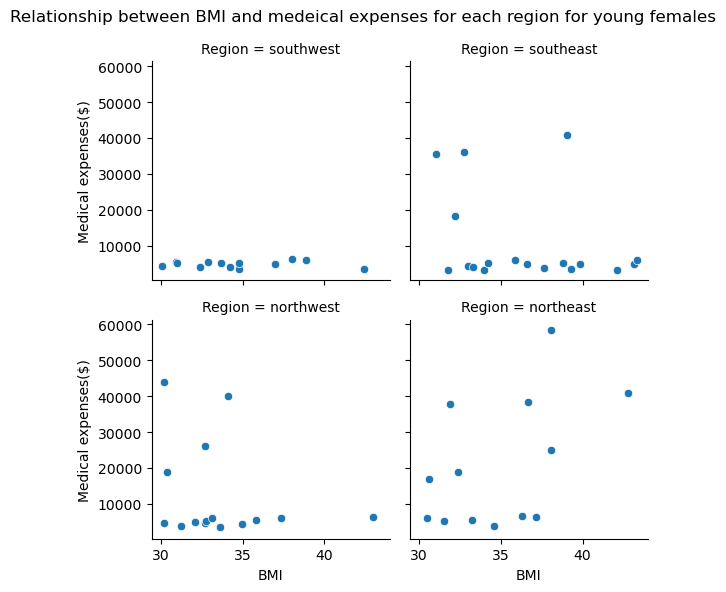

In [39]:
young_g1 = sns.FacetGrid(data=df_young, col='Region',col_wrap=2)
young_g1.fig.suptitle('Relationship between BMI and medeical expenses for each region for young females')
young_g1.map(sns.scatterplot, 'BMI', 'Medical expenses').set(ylabel='Medical expenses($)')

**Matrix**

This matrix can help me understand the average medical expenses for young female adults related to people who have children in 4 different regions in the US.

Text(0.5, 1.0, 'Relationship of Average Medical Expenses by Children and Region For Young Female Adults')

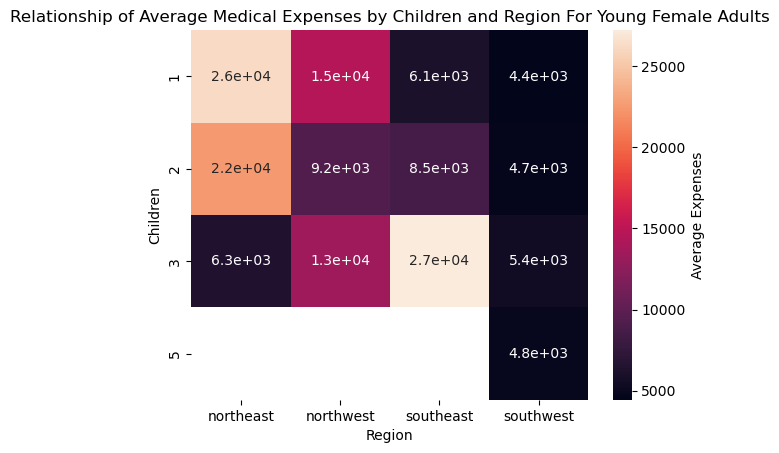

In [40]:
young_g2 = df_young.pivot_table(values='Medical expenses', index='Children', columns='Region')
sns.heatmap(young_g2, annot=True, cbar_kws={'label': 'Average Expenses'})
plt.xlabel('Region')
plt.ylabel('Children')
plt.title('Relationship of Average Medical Expenses by Children and Region For Young Female Adults')

**Bar graph**

This bar graph shows the relationship between bmi and having children in diffrent region in the US for the young female adults.

Text(0.5, 1.02, 'Relationship between region and BMI for young females with children from 1 to 5 ')

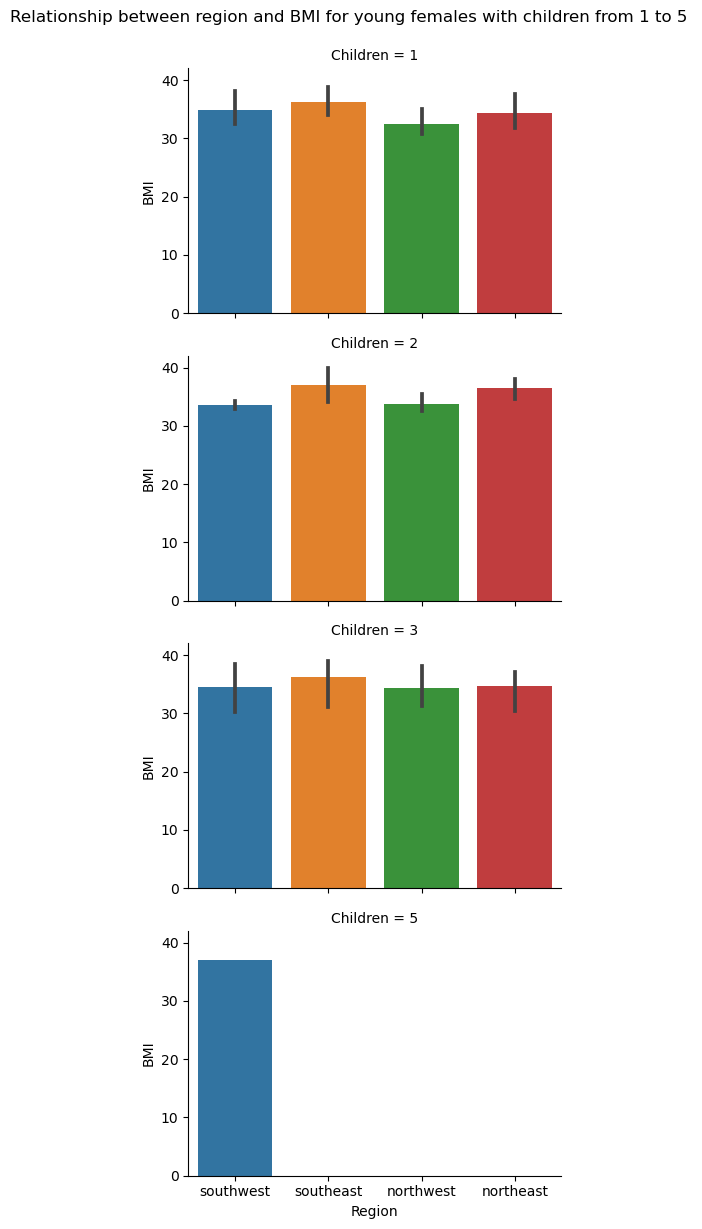

In [77]:

young_g3=sns.catplot(data=df_young,x='Region',y='BMI',row='Children',kind='bar',height=3,aspect=1.5)
young_g3.fig.suptitle('Relationship between region and BMI for young females with children from 1 to 5 ',y=1.02)


### Conclusion for 
**Female in age 20-35 with obesity (bmi >30) with children in each region**

It can be seen that there are no females in age 20-35 with obesity have 4 children, and the females in southeast, northwest, and northeast do not have children more than 3 either. Additionally, the females in southwest have quite low medical expenses regardless of number of children between 1 and 5. Their medical expenses are lower than $10000. From what I noticed from the bar graph, the females in southeast have higher BMI compared to other females in other regions. It can be seen that higher BMI for females with obesity do not always have the high medical expenses and the locations of individuals can be one of the factors of medical expenses. The age could be another factor, but we need to see the next part of my EDA to analyze if age can affect the medical expenses.

### **Middle-aged female adults**

Now let's see the dataframe that only shows the medical expenses of the middle-aged female adults who are located in the different regions of the US with children and have obesity.

In [42]:
df_mid

,Age,Sex,BMI,Children,Region,Medical expenses,Group_of_age
0,37,female,47.600,2,southwest,46113.51100,middle-aged adult
1,37,female,34.800,2,southwest,39836.51900,middle-aged adult
2,37,female,30.800,2,southeast,6313.75900,middle-aged adult
3,37,female,34.105,1,northwest,6112.35295,middle-aged adult
4,38,female,34.800,2,southwest,6571.54400,middle-aged adult
...,...,...,...,...,...,...,...
61,49,female,30.780,1,northeast,9778.34720,middle-aged adult
62,50,female,33.700,4,southwest,11299.34300,middle-aged adult
63,50,female,46.090,1,southeast,9549.56510,middle-aged adult
64,50,female,31.600,2,southwest,10118.42400,middle-aged adult


**Facetgrid**

Below is the facetgrid of middle-aged female adults who are obesity in 4 different regions in the US.

This facetgrid helps me to understand the relationship between medical expenses and bmi for individuals who are located in different regions in the US. 

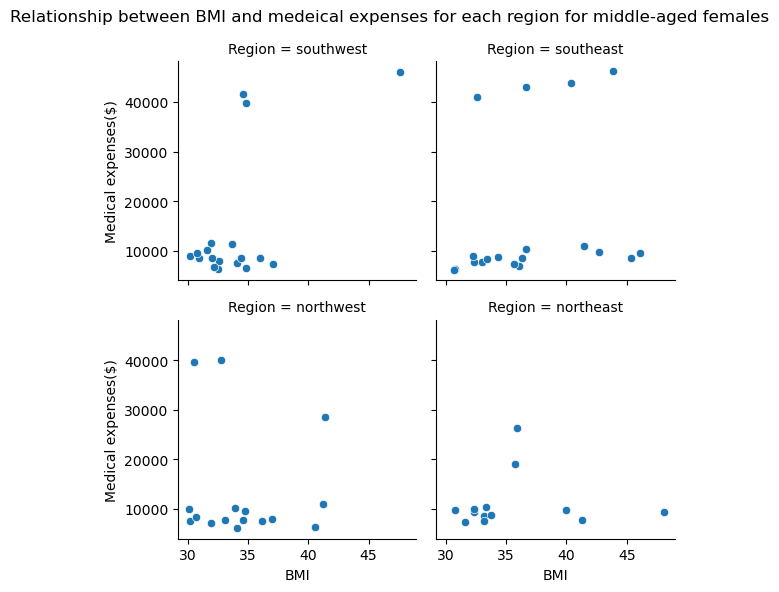

In [43]:
mid_g1 = sns.FacetGrid(data=df_mid, col='Region',col_wrap=2)
mid_g1.fig.suptitle('Relationship between BMI and medeical expenses for each region for middle-aged females')
mid_g1.map(sns.scatterplot, 'BMI', 'Medical expenses').set(ylabel='Medical expenses($)')




**Matrix**

This matrix can help me understand the average medical expenses for middle-aged female adults related to people who have children in 4 different regions in the US.

Text(0.5, 1.0, 'Relationship of Average Medical Expenses by Children and Region For Middle-Aged Adult')

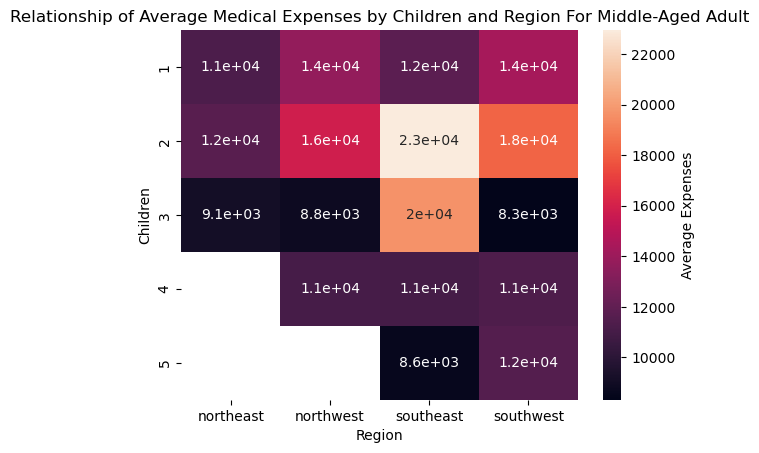

In [44]:
mid_g2 = df_mid.pivot_table(values='Medical expenses', index='Children', columns='Region')
sns.heatmap(mid_g2, annot=True, cbar_kws={'label': 'Average Expenses'})
plt.xlabel('Region')
plt.ylabel('Children')
plt.title('Relationship of Average Medical Expenses by Children and Region For Middle-Aged Adult')

**Bar graph**

This bar graph shows the relationship between bmi and having children in diffrent region in the US for the middle-aged female adults.

Text(0.5, 1.02, 'Relationship between region and BMI for middle-aged females with children from 1 to 5 ')

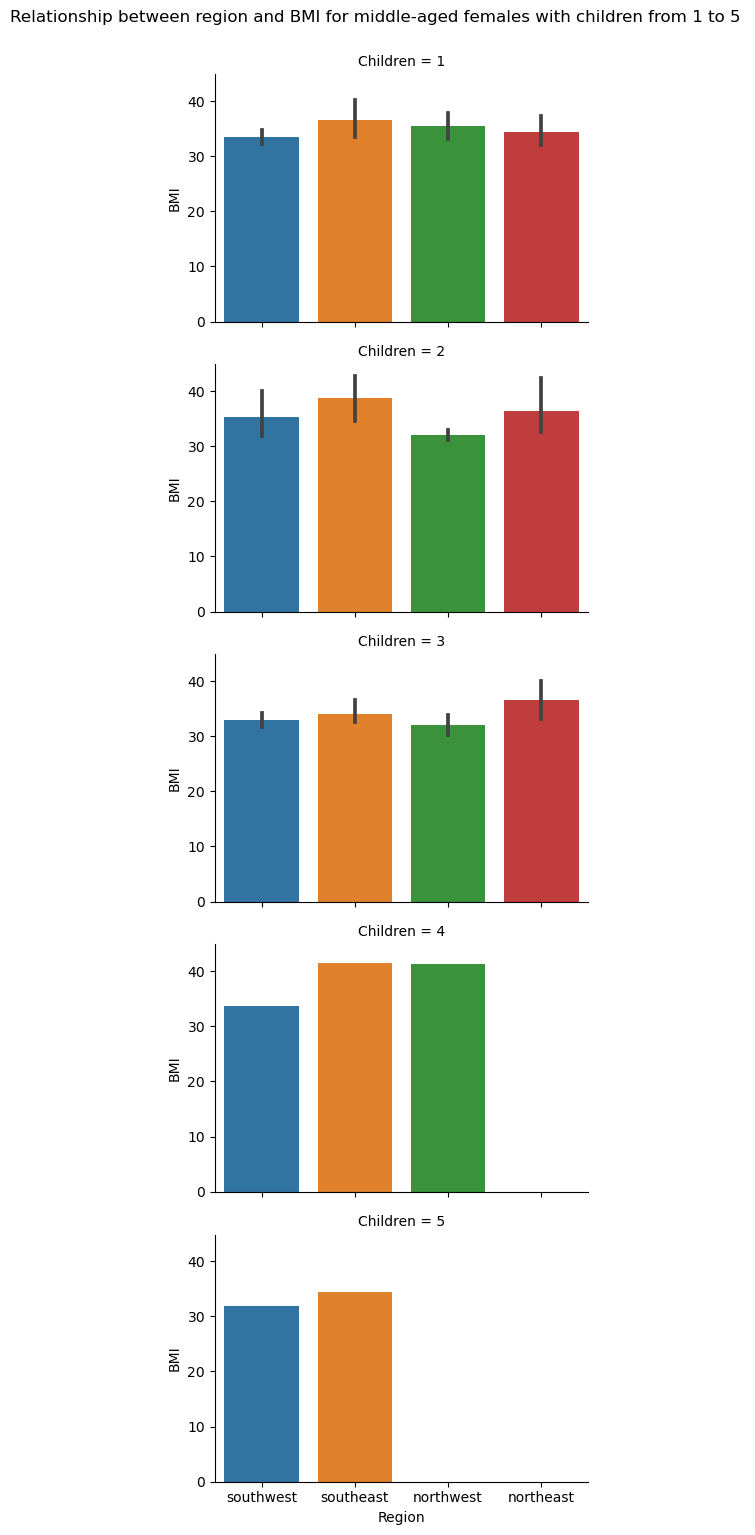

In [78]:
mid_g3=sns.catplot(data=df_mid,x='Region',y='BMI',row='Children',kind='bar',height=3,aspect=1.5)

mid_g3.fig.suptitle('Relationship between region and BMI for middle-aged females with children from 1 to 5 ',y=1.02)

### Conclusion for 
**Female in age 36-50 with obesity (bmi >30) with children in each region**

Now we can see that the females in age 36-50 with obesity with 4 and 5 children have lower medical expenses, and it turns out that the females with 2 children have quite high medical expenses, so it means the number of children may affect the medical expenses. The females in northeast seem to have low medical expenses. The females in southwest seem to have lower bmi as well, and there are just a few cases that have high bmi. From what I have noticed, the bmi may affect the medical expenses, but it really depends on individuals because most of the females (even with obesity bmi) have the medical expenses around $10000 - $13000.

## Conclusion
## Research question/interests
**How does female in age 20-35 with obesity (bmi >30) with children in each region have different medical expenses compared to female in age 36-50 with obesity with children in each region?**

Without looking of having children, the females with bmi more than 30 in the age of 20-35 have quite wide range starting from bmi at 30 to 45, whereas the females with bmi mor than 30 in the age of 36-50 have smaller range starting from 30 to 40. For young female adults and middle-aged female agults, it seems like the medical expense is not affected by bmi. 

However, if we include having children and looking closer with the diffrent regions, it can be seen that the place the females located can affect their medical expenses. Not to mention that having 4 or 5 children do not mean they will have high medical expenses. 

Then compared with the age, we can see that young female adults in northeast have higher medical expenses than the middle-aged female adults. However, for the young female adults in southwest, they have lower medical expenses compared to the middle-aged female adualts in southwest.

Therefore, the age, having children, and regions can affect the medical expenses of individuals while bmi may depend on the case.

In [46]:
df_young.to_csv('../data/processed/m5young.csv')

In [47]:
df_mid.to_csv('../data/processed/m5mid.csv')